In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load the dataset
data = pd.read_csv('Customer.csv')  

In [29]:
# Inspect the dataset
print(data.head())
print(data.info())

   CustomerID   Age  Annual Income (k$)  Spending Score (1-100)    Segment
0           1  44.0                74.0                    29.0  Segment_A
1           2  28.0                46.0                    50.0  Segment_B
2           3  33.0                97.0                    59.0  Segment_A
3           4  35.0                 NaN                    87.0  Segment_A
4           5   NaN                59.0                    44.0  Segment_C
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              194 non-null    int64  
 1   Age                     158 non-null    float64
 2   Annual Income (k$)      174 non-null    float64
 3   Spending Score (1-100)  172 non-null    float64
 4   Segment                 194 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 7.7+ KB
None


In [30]:
# Check for missing values

print("check for missing values")
print(data.isnull().sum())

check for missing values
CustomerID                 0
Age                       36
Annual Income (k$)        20
Spending Score (1-100)    22
Segment                    0
dtype: int64


In [31]:
# Optionally fill missing values
data.fillna(method='ffill', inplace=True)

In [32]:
print("check after replacing a missing values")
print(data.isnull().sum())

check after replacing a missing values
CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Segment                   0
dtype: int64


In [33]:
# Select features and target
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
target = data['Segment'] 
# Replace with actual target column
print("Features \n",features)
print("Target \n",target)

Features 
       Age  Annual Income (k$)  Spending Score (1-100)
0    44.0                74.0                    29.0
1    28.0                46.0                    50.0
2    33.0                97.0                    59.0
3    35.0                97.0                    87.0
4    35.0                59.0                    44.0
..    ...                 ...                     ...
189  33.0                82.0                    56.0
190  29.0                90.0                    60.0
191  44.0                74.0                    53.0
192  44.0                80.0                    69.0
193  37.0                66.0                    48.0

[194 rows x 3 columns]
Target 
 0      Segment_A
1      Segment_B
2      Segment_A
3      Segment_A
4      Segment_C
         ...    
189    Segment_B
190    Segment_C
191    Segment_A
192    Segment_B
193    Segment_C
Name: Segment, Length: 194, dtype: object


In [43]:
# Encode target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

#useful for converting categorical labels into numeric values
#fit(): Learns the unique classes and assigns an integer to each class.
#transform(): Converts the original target variable into the integer values based on the learned mapping.
target_encoded
    

array([0, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0,
       1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2])

In [45]:
# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
#Standardizing features scales them to a common range,
#ensuring each feature contributes equally to the model's performance. This improves accuracy and speeds 

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_encoded, test_size=0.2, random_state=0)

In [37]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


In [38]:
# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'report': classification_report(y_test, y_pred, target_names=label_encoder.classes_),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Print performance metrics
    print(f"\n{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{results[name]['report']}")
    


Logistic Regression Accuracy: 0.3076923076923077
Logistic Regression Classification Report:
              precision    recall  f1-score   support

   Segment_A       0.38      0.19      0.25        16
   Segment_B       0.20      0.57      0.30         7
   Segment_C       0.45      0.31      0.37        16

    accuracy                           0.31        39
   macro avg       0.34      0.36      0.31        39
weighted avg       0.38      0.31      0.31        39


Decision Tree Accuracy: 0.3076923076923077
Decision Tree Classification Report:
              precision    recall  f1-score   support

   Segment_A       0.44      0.44      0.44        16
   Segment_B       0.21      0.43      0.29         7
   Segment_C       0.22      0.12      0.16        16

    accuracy                           0.31        39
   macro avg       0.29      0.33      0.29        39
weighted avg       0.31      0.31      0.30        39


Random Forest Accuracy: 0.2564102564102564
Random Forest Classi

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



Gradient Boosting Accuracy: 0.23076923076923078
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

   Segment_A       0.33      0.19      0.24        16
   Segment_B       0.11      0.29      0.16         7
   Segment_C       0.33      0.25      0.29        16

    accuracy                           0.23        39
   macro avg       0.26      0.24      0.23        39
weighted avg       0.29      0.23      0.24        39



In [39]:
# Example new customer data
new_customers = pd.DataFrame({
    'Age': [25, 40],
    'Annual Income (k$)': [50, 80],  # Ensure to use the same column names as in the dataset
    'Spending Score (1-100)': [60, 30]
})

# Standardize new customer data
new_customers_scaled = scaler.transform(new_customers)

# Predict segments for new customer data with each model
for name, model in models.items():
    predicted_segments = model.predict(new_customers_scaled)
    new_customers[f'{name} PredictedSegment'] = label_encoder.inverse_transform(predicted_segments)

print("\nNew Customer Predictions:\n", new_customers)


New Customer Predictions:
    Age  Annual Income (k$)  Spending Score (1-100)  \
0   25                  50                      60   
1   40                  80                      30   

  Logistic Regression PredictedSegment Decision Tree PredictedSegment  \
0                            Segment_B                      Segment_C   
1                            Segment_A                      Segment_A   

  Random Forest PredictedSegment Support Vector Classifier PredictedSegment  \
0                      Segment_B                                  Segment_B   
1                      Segment_A                                  Segment_A   

  K-Nearest Neighbors PredictedSegment Gradient Boosting PredictedSegment  
0                            Segment_A                          Segment_C  
1                            Segment_A                          Segment_A  


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


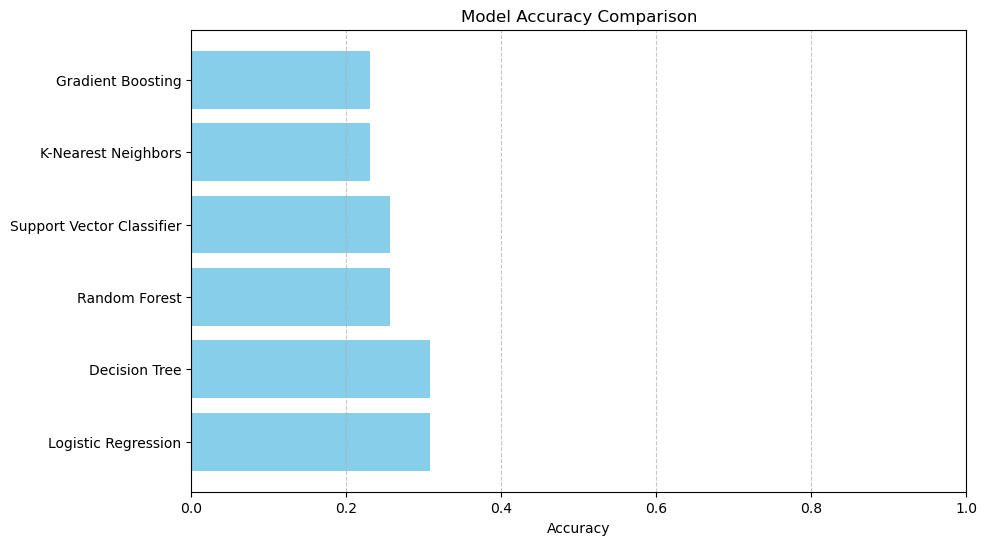

In [42]:
# Plot confusion matrices and feature importances
for name, model in models.items():
    cm = results[name]['confusion_matrix']

# Extract model names and their corresponding accuracies
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

# Create a bar plot for model accuracies
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Accuracy is between 0 and 1
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()